# Fashion Mnist Classification

## Initial Setup

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## Get Data

### Load Data from Source

In [ ]:
import tensorflow as tf
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

4423680/4422102 [==============================] - 0s 0us/step


### Split Data

In [ ]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.
print("Training Set: ", X_train.shape)
print("Validation Set: ", X_valid.shape)
print("Test Set: ", X_test.shape)

Training Set:  (55000, 28, 28)
Validation Set:  (5000, 28, 28)
Test Set:  (10000, 28, 28)


In [ ]:
X_train_f = X_train.reshape((X_train.shape[0], -1))
X_valid_f = X_valid.reshape((X_valid.shape[0], -1))
X_test_f = X_test.reshape((X_test.shape[0], -1))

print("Training Set: ", X_train_f.shape)
print("Validation Set: ", X_valid_f.shape)
print("Test Set: ", X_test_f.shape)

Training Set:  (55000, 784)
Validation Set:  (5000, 784)
Test Set:  (10000, 784)


### Plot Data


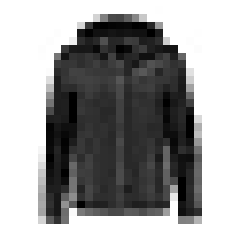

In [ ]:

plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

Saving figure fashion_mnist_plot


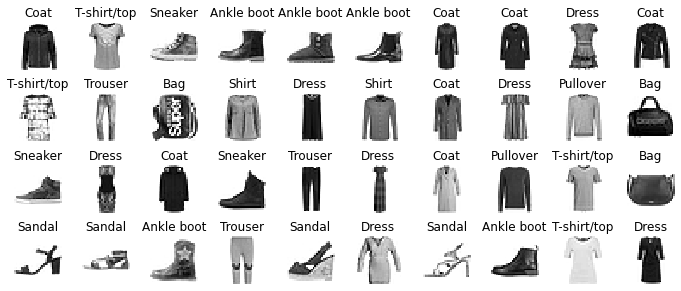

In [ ]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

   ## Train Model

### Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def summarize_classification(y_test,y_pred, avg_method="weighted"):
    
    acc = accuracy_score(y_test,y_pred,normalize=True)
    num_acc = accuracy_score(y_test,y_pred,normalize=False)
    prec = precision_score(y_test,y_pred, average=avg_method)
    recall = recall_score(y_test,y_pred, average=avg_method)
    
    return{'Accuracy:': acc,
        'Accuracy_count:': num_acc,
        'Precision:': prec,
        'Recall:': recall,
        'Data Count:': len(y_test)}

In [21]:
logistic_model = LogisticRegression(solver="sag", multi_class="auto", max_iter=100).fit(X_train_f, y_train)
y_pred = logistic_model.predict(X_test_f)
summarize_classification(y_test,y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


{'Accuracy:': 0.8438,
 'Accuracy_count:': 8438,
 'Data Count:': 10000,
 'Precision:': 0.8425727700514124,
 'Recall:': 0.8438}

### Perceptron

In [ ]:
from sklearn.linear_model import Perceptron

perceptron_model = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
perceptron_model.fit(X_train_f, y_train)

y_pred = perceptron_model.predict(X_test_f)
summarize_classification(y_test,y_pred)

{'Accuracy:': 0.8068,
 'Accuracy_count:': 8068,
 'Data Count:': 10000,
 'Precision:': 0.822115365300946,
 'Recall:': 0.8068}

## MLP with Keras

### NN Architecture

In [25]:

import tensorflow as tf
from tensorflow import keras

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)


model = keras.models.Sequential([
    keras.layers.Flatten(name='flatten',input_shape=[28, 28]),
    keras.layers.Dense(name='hidden_1', units=300, activation="relu"),
    keras.layers.Dense(name='hidden_2', units=100, activation="relu"),
    keras.layers.Dense(name='output', units=10, activation="softmax")
])


In [26]:
model.layers

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
hidden_1 (Dense)             (None, 300)               235500    
_________________________________________________________________
hidden_2 (Dense)             (None, 100)               30100     
_________________________________________________________________
output (Dense)               (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


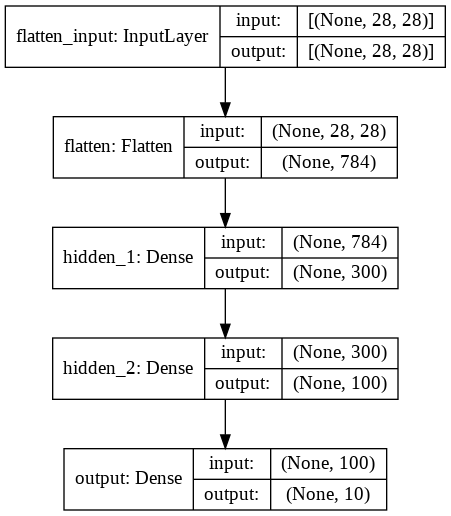

In [28]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

### Training

In [ ]:

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 1.0187 - accuracy: 0.6805 - val_loss: 0.5213 - val_accuracy: 0.8226
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5027 - accuracy: 0.8262 - val_loss: 0.4353 - val_accuracy: 0.8526
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4483 - accuracy: 0.8428 - val_loss: 0.5304 - val_accuracy: 0.7996
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4209 - accuracy: 0.8532 - val_loss: 0.3916 - val_accuracy: 0.8650
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4061 - accuracy: 0.8583 - val_loss: 0.3745 - val_accuracy: 0.8690
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3754 - accuracy: 0.8673 - val_loss: 0.3718 - val_accuracy: 0.8724
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3652 - accuracy: 0.8705 - val_loss: 0.3616 - val_accuracy:

### Evaluation

In [ ]:
history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

Saving figure keras_learning_curves_plot


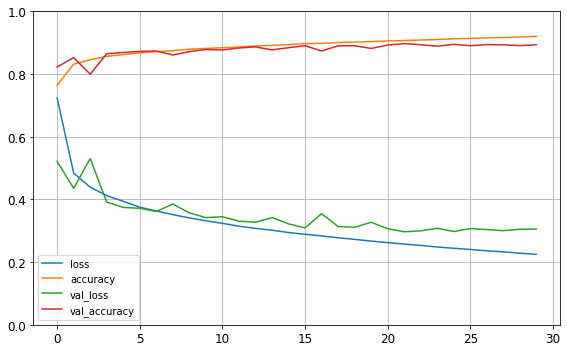

In [ ]:

import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()

In [ ]:

model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.3382 - accuracy: 0.8822


[0.3381877839565277, 0.8822000026702881]